# Microsoft Malware Prediction competition on Kaggle

### Goal: The general idea is to predict which devices are most likely to be infected by malware based on device characteristics.

Link to the competition website: https://www.kaggle.com/c/microsoft-malware-prediction

__General steps to take:__
1. Import the dataset and get a feeling for the data.
2. EDA (exploratory data analysis) to get first insights and get familiar with the data set.
3. Clean the data, processing of data into format that can be used by ML algorithms.
4. Build the model and train the model.
5. Evaluate the model.
6. Change hyper-parameters to improve model performance.
7. (Deploy model to be actually usable but skipped here.)

<img src="1_PAqzvCxPjpDN8RC9HQw45w.png">

## Import all libraries and the dataset, then get a 'feeling' for the data:

In [69]:
#!/usr/bin/python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

#import standard ML libraries
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.utils.multiclass import unique_labels

#import specific classifiers
from sklearn.ensemble import RandomForestClassifier
print('Lib import check positive ++.')

Lib import check positive ++.


**Import the dataset (or a sample of the entire file) and get a feeling for the data:**

In [70]:
%%time
#import the data and get a feeling for which columns and data types it contains:
df = pd.read_csv('train.csv',nrows=20000, encoding='utf8', engine='python')
print('='*15 + 'Dataframe column overview: ' + '='*15)
print(df.describe())
print('='*15 + 'Dataframe dimensions: ' + '='*15)
print(df.shape)
print('='*15 + 'All column names: ' + '='*15)
print(df.columns.values)

===============Dataframe column overview: ===============
        IsBeta  RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
count  20000.0      19929.000000      20000.000000                 927.000000   
mean       0.0          6.853731          0.016000                1614.546926   
std        0.0          0.996447          0.125478                 990.182147   
min        0.0          0.000000          0.000000                  10.000000   
25%        0.0          7.000000          0.000000                 788.000000   
50%        0.0          7.000000          0.000000                1632.000000   
75%        0.0          7.000000          0.000000                2281.500000   
max        0.0          8.000000          1.000000                3195.000000   

       AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
count               19917.000000         19917.000000       19917.000000   
mean                47865.443290             1.320982       

In [72]:
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
5,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
6,0000161e8abf8d8b89c5ab8787fd712b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.845.0,0,7.0,0,NaN,43927.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1
7,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,NaN,53447.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,NaN,53447.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
9,00001a18d69bb60bda9779408dcf02ac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.973.0,0,7.0,0,NaN,46413.0,...,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1


In [7]:
#check each column for how many unique values it contains:
unique_values = df.nunique().sort_values()
print(unique_values)

PuaMode                                                  1
IsBeta                                                   1
Census_IsWIMBootEnabled                                  1
Census_IsFlightingInternal                               1
Census_IsFlightsDisabled                                 1
AutoSampleOptIn                                          1
HasDetections                                            2
SMode                                                    2
Firewall                                                 2
UacLuaenable                                             2
Census_DeviceFamily                                      2
Census_HasOpticalDiskDrive                               2
Census_IsPortableOperatingSystem                         2
HasTpm                                                   2
Census_IsSecureBootEnabled                               2
Census_IsVirtualDevice                                   2
IsSxsPassiveMode                                        

__Seems like the dataframe has 83 columns of mixed types (binary and non-binary). The 'MachineIdentifier' column seems to be the only column with all unique columns.__

## EDA (Exploratory Data Analysis):

First ideas and hypotheses: 
1. Touch-enabed devices are more likely to be mobile devices without anti-virus software so they have more malware.
2. Same goes for pen-cabable devices, those are probably not PCs/ Laptops with better anti-malware software.
3. "Census_IsAlwaysOnAlwaysConnectedCapable" could indicate IoT devices that probably have worse anti-malware software so they have more Malware.

**1. Touch enabled devices:**

In [8]:
#select touch enabled devices and see if they have a higher chance of being affected by malware:
df_touchenabled = df[['Census_IsTouchEnabled','HasDetections']]
df_touchenabled[['Census_IsTouchEnabled']] = df_touchenabled[['Census_IsTouchEnabled']].astype(bool)
df_touchenabled_pivot_avg = pd.pivot_table(df_touchenabled, values = 'HasDetections', index=['Census_IsTouchEnabled'])
df_touchenabled_pivot_count = pd.pivot_table(df_touchenabled, values = 'HasDetections', index=['Census_IsTouchEnabled'], aggfunc='count')
print("Dataframe dimensions: ", df_touchenabled.shape)
print(df_touchenabled_pivot_avg)
print(df_touchenabled_pivot_count)

Dataframe dimensions:  (20000, 2)
                       HasDetections
Census_IsTouchEnabled               
False                       0.510139
True                        0.436823
                       HasDetections
Census_IsTouchEnabled               
False                          17507
True                            2493


C:\Users\Lorenz\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


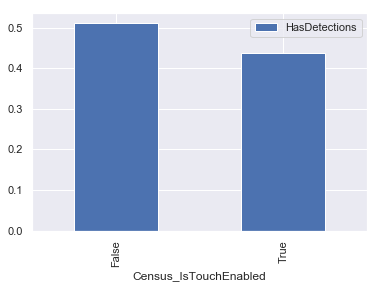

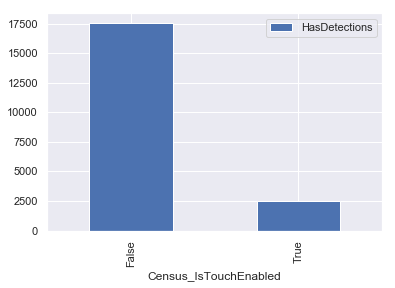

In [73]:
df_touchenabled_pivot_avg.plot(kind='bar')
df_touchenabled_pivot_count.plot(kind='bar')

 --> Interestingly, touch-enabled devices actually seem to have a lower probability to have malware than non-touch devices. But also keeping in mind that around 87,5 % of all devices in the sample are not touch-enabled.

**2. Pen enabled devices:**

In [74]:
#select touch enabled devices and see if they have a higher chance of being affected by malware:
df_pen_enabled = df[['Census_IsPenCapable','HasDetections']]
df_pen_enabled[['Census_IsPenCapable']] = df_pen_enabled[['Census_IsPenCapable']].astype(bool)
df_pen_enabled_pivot_avg = pd.pivot_table(df_pen_enabled, values = 'HasDetections', index=['Census_IsPenCapable'])
df_pen_enabled_pivot_count = pd.pivot_table(df_pen_enabled, values = 'HasDetections', index=['Census_IsPenCapable'], aggfunc='count')
print("Dataframe dimensions: ", df_pen_enabled.shape)
print(df_pen_enabled_pivot_avg)
print(df_pen_enabled_pivot_count)

Dataframe dimensions:  (20000, 2)
                     HasDetections
Census_IsPenCapable               
False                     0.501507
True                      0.488158
                     HasDetections
Census_IsPenCapable               
False                        19240
True                           760


C:\Users\Lorenz\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


 --> Only around 3.7% are pen-capable, but pen-enabled devices seem to have a marginally lower probability to be affected by malware, although the difference is smaller than with the touch-enabled feature.

**3. IoT devices:**

In [11]:
#select touch enabled devices and see if they have a higher chance of being affected by malware:
df_alwaysConnected = df[['Census_IsAlwaysOnAlwaysConnectedCapable','HasDetections']]
df_alwaysConnected[['Census_IsAlwaysOnAlwaysConnectedCapable']] = df_alwaysConnected[['Census_IsAlwaysOnAlwaysConnectedCapable']].astype(bool)
df_alwaysConnected_pivot_avg = pd.pivot_table(df_alwaysConnected, values = 'HasDetections', index=['Census_IsAlwaysOnAlwaysConnectedCapable'])
df_alwaysConnected_pivot_count = pd.pivot_table(df_alwaysConnected, values = 'HasDetections', index=['Census_IsAlwaysOnAlwaysConnectedCapable'],aggfunc='count')
print("Dataframe dimensions: ", df_alwaysConnected.shape)
print(df_alwaysConnected_pivot_avg)
print(df_alwaysConnected_pivot_count)

Dataframe dimensions:  (20000, 2)
                                         HasDetections
Census_IsAlwaysOnAlwaysConnectedCapable               
False                                         0.507538
True                                          0.406491
                                         HasDetections
Census_IsAlwaysOnAlwaysConnectedCapable               
False                                            18706
True                                              1294


C:\Users\Lorenz\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


 --> Only around 6.5% are suspected IoT devices, but they seem to have a lower rate of infection with Malware.

## Machine Learning:

**Preprocessing: Get the columns with only 2 or 3 unique values as a starting point to separate into individual columns, otherwise the number of columns will get huge:**

In [91]:
#fill all NaN values with a 0.0
# (this assumption may be challenged later on, does not have to be true.)
df = df.fillna(0.0)

#split the data into actual feature data and the target column (in this case "HasDetection")
Y = df[['HasDetections']]
X = df.drop(['HasDetections'],axis=1)

In [80]:
#make a list with all the columns that have only 2 unique values in them:
print('====Only 2 unique values.')
df_unique_values_two = unique_values[unique_values == 2]
list_two_unique_value_columns = (list(df_unique_values_two.index))
print(list_two_unique_value_columns)

#make a list with all the columns that have only 3 unique values in them:
print('====Only 3 unique values.')
df_unique_values_three = unique_values[unique_values == 3]
list_three_unique_value_columns = (list(df_unique_values_three.index))
print(list_three_unique_value_columns)

#concatenate to get a list of all column names with 2 or 3 unique values
list_two_three_unique_value_columns = list_two_unique_value_columns + list_three_unique_value_columns

====Only 2 unique values.
['HasDetections', 'SMode', 'Firewall', 'UacLuaenable', 'Census_DeviceFamily', 'Census_HasOpticalDiskDrive', 'Census_IsPortableOperatingSystem', 'HasTpm', 'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice', 'IsSxsPassiveMode', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'ProductName', 'Census_ThresholdOptIn', 'IsProtected']
====Only 3 unique values.
['Census_OSArchitecture', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorClass', 'Processor']


In [81]:
#make dataframe of the original with only the columns that have two unique values:
df_two_three_uniques = df[list_two_three_unique_value_columns]
print("Number of columns in the dataframe with 2/3 unique values in each column: ", df_two_three_uniques.shape[1])
df_two_three_uniques

Number of columns in the dataframe with 2/3 unique values in each column:  22


,HasDetections,SMode,Firewall,UacLuaenable,Census_DeviceFamily,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,HasTpm,Census_IsSecureBootEnabled,Census_IsVirtualDevice,...,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,ProductName,Census_ThresholdOptIn,IsProtected,Census_OSArchitecture,Census_ProcessorManufacturerIdentifier,Census_ProcessorClass,Processor
0,0,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
1,0,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
2,0,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
3,1,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
4,1,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
5,1,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
6,1,0.0,1.0,1.0,Windows.Desktop,0,0,1,1,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,1.0,0,x64
7,0,0.0,1.0,1.0,Windows.Desktop,1,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
8,0,0.0,1.0,1.0,Windows.Desktop,0,0,1,0,0.0,...,0,0.0,0.0,win8defender,0.0,1.0,amd64,5.0,0,x64
9,1,0.0,1.0,1.0,Windows.Desktop,1,0,1,1,0.0,...,0,0.0,1.0,win8defender,0.0,1.0,amd64,5.0,0,x64


In [84]:
#split the data into actual feature data and the target column (in this case "HasDetection")
X_two_three = df_two_three_uniques.drop(['HasDetections'],axis=1)
Y_two_three = df_two_three_uniques[['HasDetections']]
X_two_three_cols = list(X_two_three.columns)

In [85]:
#create dummies, split rows with differing values into separate columns:
X_two_three = pd.get_dummies(data=X_two_three, columns=X_two_three_cols)
X_two_three

,SMode_0.0,SMode_1.0,Firewall_0.0,Firewall_1.0,UacLuaenable_0.0,UacLuaenable_1.0,Census_DeviceFamily_Windows.Desktop,Census_DeviceFamily_Windows.Server,Census_HasOpticalDiskDrive_0,Census_HasOpticalDiskDrive_1,...,Census_ProcessorManufacturerIdentifier_1.0,Census_ProcessorManufacturerIdentifier_5.0,Census_ProcessorManufacturerIdentifier_10.0,Census_ProcessorClass_0.0,Census_ProcessorClass_high,Census_ProcessorClass_low,Census_ProcessorClass_mid,Processor_arm64,Processor_x64,Processor_x86
0,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
8,1,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
9,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_two_three, Y_two_three, test_size=0.3) # 70% training and 30% test

In [26]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y
clf.fit(X_train, y_train)

C:\Users\Lorenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

**Evaluate how good the model is and check which features contribute most to model:**

In [27]:
#test the classifier's accuracy:
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5341666666666667


In [28]:
cm = confusion_matrix(y_test, y_pred)
labels = [0,1]
cm

array([[ 914, 2066],
       [ 729, 2291]], dtype=int64)

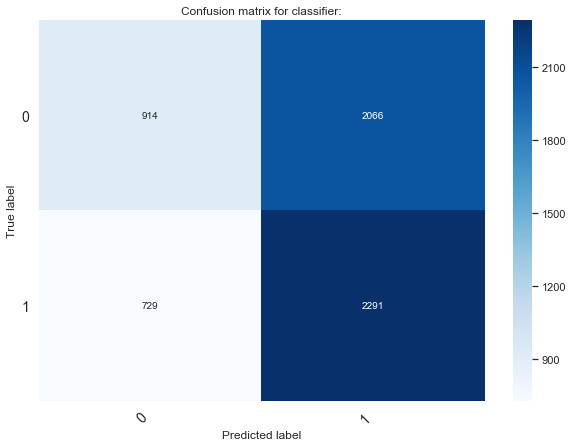

In [29]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for classifier:')
    #fig.colorbar(shrink=0.8)
    return fig
fig = print_confusion_matrix(cm,labels)

In [31]:
#check which features have the highest predictive value
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

IsProtected_0.0                                0.053883
Census_IsSecureBootEnabled_1                   0.046634
IsProtected_1.0                                0.043168
Census_IsTouchEnabled_0                        0.042081
Wdft_IsGamer_0.0                               0.040298
Census_HasOpticalDiskDrive_1                   0.038668
Census_IsSecureBootEnabled_0                   0.037073
Census_IsPenCapable_1                          0.035241
Census_ProcessorManufacturerIdentifier_5.0     0.034706
Census_IsTouchEnabled_1                        0.032684
Census_ProcessorManufacturerIdentifier_1.0     0.031796
Processor_x64                                  0.031222
Census_OSArchitecture_amd64                    0.030806
Wdft_IsGamer_1.0                               0.029665
Census_IsAlwaysOnAlwaysConnectedCapable_1.0    0.029368
Census_IsVirtualDevice_1.0                     0.029200
Firewall_0.0                                   0.029176
Processor_x86                                  0

No handles with labels found to put in legend.


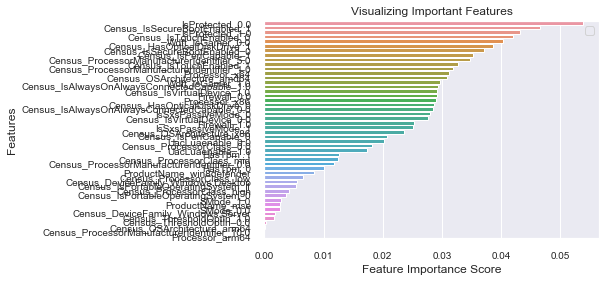

In [44]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10, size=10)
plt.show()

**Take all columns for the ML model:**

In [86]:
#split the data into actual feature data and the target column (in this case "HasDetection")
Y_all_cols = df[['HasDetections']]
X_all_cols = df.drop(['HasDetections'],axis=1)
X_all_cols_list = (list(X_all_cols.columns.values))
X_all_cols_list

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 

In [63]:
#attempt to take out the columns with low variance:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.5)
sel.fit_transform(X_all_cols)

ValueError: could not convert string to float: '0000028988387b115f69f31a3bf04f09'

In [92]:
#drop the columns with high variety:
cols_to_drop = ['AvSigVersion','Census_FirmwareVersionIdentifier','CityIdentifier','Census_OEMModelIdentifier','Census_SystemVolumeTotalCapacity','MachineIdentifier']
X_without_large_cols = X.drop(columns=cols_to_drop, axis=1)
#create dummies, split rows with differing values into separate columns:
X_proc= pd.get_dummies(data=X_without_large_cols, columns=list(X_without_large_cols.columns.values))
X_proc

,ProductName_mse,ProductName_win8defender,EngineVersion_1.1.12805.0,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13407.0,EngineVersion_1.1.13504.0,...,Wdft_RegionIdentifier_6.0,Wdft_RegionIdentifier_7.0,Wdft_RegionIdentifier_8.0,Wdft_RegionIdentifier_9.0,Wdft_RegionIdentifier_10.0,Wdft_RegionIdentifier_11.0,Wdft_RegionIdentifier_12.0,Wdft_RegionIdentifier_13.0,Wdft_RegionIdentifier_14.0,Wdft_RegionIdentifier_15.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_proc, Y, test_size=0.2) # 70% training and 30% test

C:\Users\Lorenz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy:  0.5805


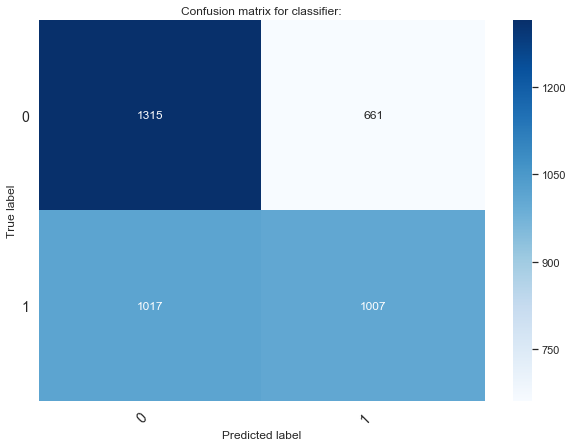

In [95]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y
clf.fit(X_train, y_train)
#test the classifier's accuracy:
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = [0,1]
fig = print_confusion_matrix(cm,labels)

**--> With 58% accuracy slightly better than the previous model but still pretty bad.**

**Let's try with gridsearch CV to get better hyper parameters for the model:**

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

C:\Users\Lorenz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lorenz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lorenz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lorenz\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector 